In [39]:
import numpy as np

counter = 0
alphabet = 'abcdefghijklmnopqrstuvwxyz'


class KDTree:
    def __init__(self, points, node_size=2, depth=0):
        self.points = points
        self.median = None
        self.children = []
        self.left = None
        self.right = None
        self.centroid = np.mean(points, axis=0)
        self.name = 0

        if len(points) <= node_size:
            global counter
            self.name = alphabet[counter]
            counter += 1
            return
            # Select axis based on depth so that axis cycles over all valid values
        axis = depth % 2

        # Sort point list and choose median as pivot element
        sorted_indices = np.argsort(points[:, axis])
        points = points[sorted_indices]
        median_idx = len(points) // 2

        # Create node and construct subtrees
        self.left = KDTree(points[:median_idx], node_size, depth + 1)
        self.right = KDTree(points[median_idx:], node_size, depth + 1)
        self.children = [self.right, self.left]

        self.median = points[median_idx]
        self.axis = axis

    def set_rectangle_center(self, points):
        """Vypočítá střed obdelníku pro listový uzel."""
        min_x, min_y = np.min(points, axis=0)
        max_x, max_y = np.max(points, axis=0)
        self.rectangle_center = ((min_x + max_x) / 2, (min_y + max_y) / 2)

    def visualize(self, ax, min_x, max_x, min_y, max_y, depth=0):
        # Define a list of colors to cycle through for each depth
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        color = "r"

        self.set_rectangle_center(self.points)
        if self.name:
            ax.text(self.rectangle_center[0], self.rectangle_center[1], self.name)

        if self.median is not None:
            if self.axis == 0:  # x-axis
                ax.plot([self.median[0], self.median[0]], [min_y, max_y], color + '-')


                if self.left:
                    self.left.visualize(ax, min_x, self.median[0], min_y, max_y, depth + 1)
                if self.right:
                    self.right.visualize(ax, self.median[0], max_x, min_y, max_y, depth + 1)
            else:  # y-axis
                ax.plot([min_x, max_x], [self.median[1], self.median[1]], color + '-')
                # ax.text(self.median[0], self.median[1], alphabet[counter])

                if self.left:
                    self.left.visualize(ax, min_x, max_x, min_y, self.median[1], depth + 1)
                if self.right:
                    self.right.visualize(ax, min_x, max_x, self.median[1], max_y, depth + 1)




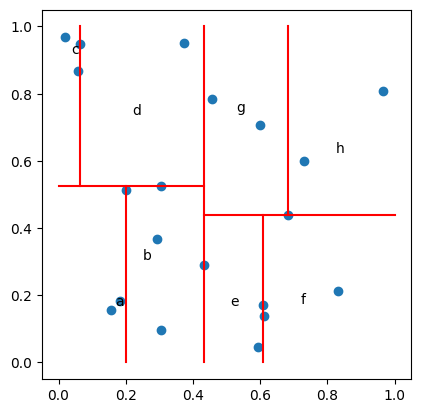

In [40]:

# Example usage
points = np.array([
    [0.3745401188473625, 0.9507143064099162],
    [0.7319939418114051, 0.5986584841970366],
    [0.15601864044243652, 0.15599452033620265],
    [0.05808361216819946, 0.8661761457749352],
    [0.6011150117432088, 0.7080725777960455],
    [0.020584494295802447, 0.9699098521619943],
    [0.8324426408004217, 0.21233911067827616],
    [0.18182496720710062, 0.18340450985343382],
    [0.3042422429595377, 0.5247564316322378],
    [0.43194501864211576, 0.2912291401980419],
    [0.6118528947223795, 0.13949386065204183],
    [0.29214464853521815, 0.3663618432936917],
    [0.45606998421703593, 0.7851759613930136],
    [0.19967378215835974, 0.5142344384136116],
    [0.5924145688620425, 0.046450412719997725],
    [0.6075448519014384, 0.17052412368729153],
    [0.06505159298527952, 0.9488855372533332],
    [0.9656320330745594, 0.8083973481164611],
    [0.3046137691733707, 0.09767211400638387],
    [0.6842330265121569, 0.4401524937396013]
])

tree = KDTree(points, 3)
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
tree.visualize(ax, 0, 1, 0, 1)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.savefig("kdtree.pdf")
plt.show()


In [41]:
from PrettyPrint import PrettyPrintTree

pt = PrettyPrintTree(lambda x: x.children, lambda x: x.name)
pt(tree)

               0 
       ┌───────┴───────┐
       0               0       
   ┌───┴───┐       ┌───┴───┐   
   0       0       0       0   
 ┌─┴─┐   ┌─┴─┐   ┌─┴─┐   ┌─┴─┐ 
 h   g   f   e   d   c   b   a 
